In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
import datasets
import tsa
import seaborn

In [2]:
ts = datasets.passengers()

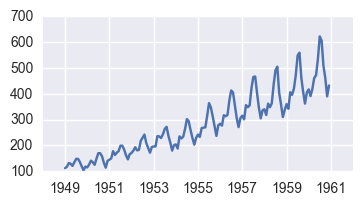

In [3]:
plt.figure(figsize = (4, 2))
ts.plot()
plt.xlim(('1948', '1962'))
plt.show()

In [7]:
ts.groupby(ts.index.month).mean()

1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
dtype: float64

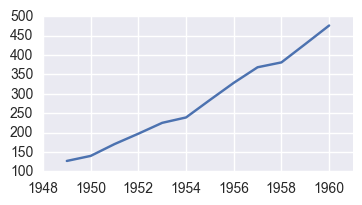

In [4]:
plt.figure(figsize = (4, 2))
ts.resample('A').mean().plot()
plt.xlim(('1948', '1961'))
plt.show()

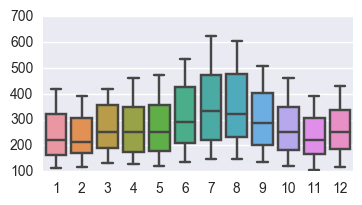

In [5]:
plt.figure(figsize = (4, 2))
seaborn.boxplot(ts.index.month, ts)
plt.show()

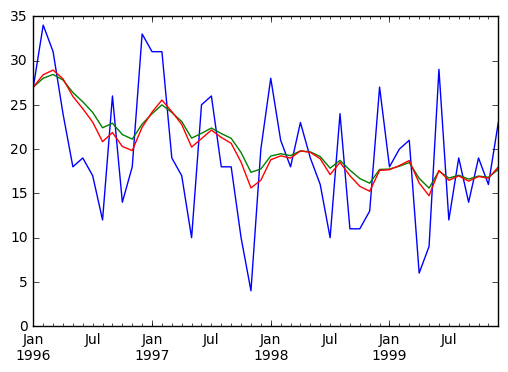

In [4]:
ts = datasets.motor()

# print ts.ewm(com = 1, adjust = False).mean().head()
# print tsa.ewma(ts.values[:5], alpha = 0.5)

ts.plot()
pd.Series(tsa.ewma(ts.values, alpha = 0.143), ts.index).plot()
pd.Series(tsa.ewma(ts.values, alpha = 0.2), ts.index).plot()

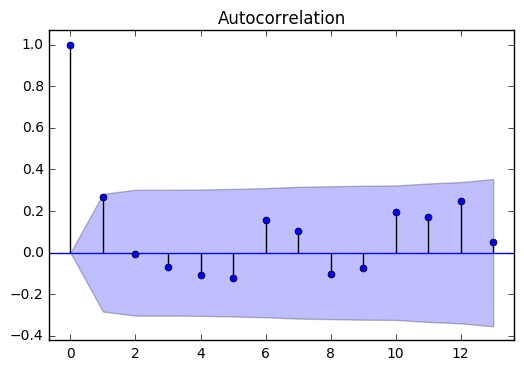

In [3]:
sm.graphics.tsa.plot_acf(ts.values, lags = 13)
plt.show()

In [217]:
ts = datasets.passengers()
parts = sm.tsa.seasonal_decompose(ts.values, model = 'multiplicative', freq = 12)
acf = sm.tsa.acf(ts, nlags = 100)

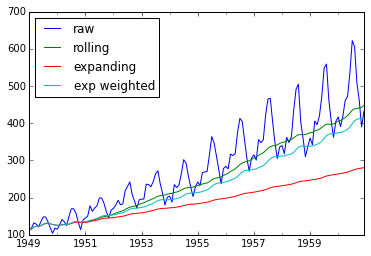

In [57]:
ts.plot(label = 'raw')
ts.rolling(25).mean().plot(label = 'rolling')
ts.expanding().mean().plot(label = 'expanding')
ts.ewm(com = 25).mean().plot(label = 'exp weighted')
plt.legend(loc ='upper left')
plt.show()

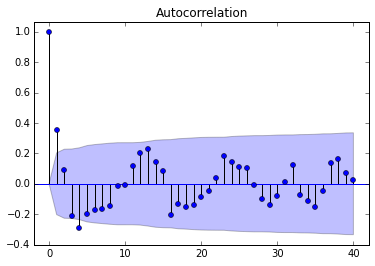

In [224]:
sm.graphics.tsa.plot_acf(parts.resid[7 : 100], lags = 40)
plt.show()

In [19]:
fit = sm.tsa.AR(ts).fit(3)
print fit.params
print fit.aic, fit.bic, fit.hqic

const    16.944345
L1.y      1.301721
L2.y     -0.509949
L3.y     -0.130250
dtype: float64
5.63580397958 5.69664687341 5.66013716178


In [61]:
fit = sm.tsa.ARMA(ts, (3, 3)).fit()
print fit.params
print fit.aic, fit.bic, fit.hqic

const      48.865608
ar.L1.y     2.546062
ar.L2.y    -2.441383
ar.L3.y     0.869939
ma.L1.y    -1.411675
ma.L2.y     0.431192
ma.L3.y     0.159175
dtype: float64
2575.6956449 2605.56237512 2587.63642059
